# SARSA(λ)

In [23]:
import gym
import numpy as np
from numpy.random import random, choice
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
def epsilon_greedy(state, Q, epsilon):

  Qvalues = Q[state,:]
  max_Qvalue = max(Qvalues)
  num_actions = len(Qvalues)

  greedy_actions = [a for a in range(num_actions) if Qvalues[a] == max_Qvalue] # Stores indices of actions with maximum Q-values for given state

  if random() < epsilon:
    return choice([a for a in range(num_actions)])
  else:
    return choice([a for a in greedy_actions])

**Environment:** Frozen Lake

https://gymnasium.farama.org/environments/toy_text/frozen_lake/

In [25]:
env = gym.make("FrozenLake-v1")

In [26]:
# Hyperparameters
episodes = 10000 # Number of episodes
gamma = 1.0 # Discount factor
alpha = 0.1 # Learning rate
epsilon = 1.0 # Exploration factor
epsilon_decay = 0.999 # Decay per episode
eligibility_decay = 0.3 # Lambda

# Accumulating Traces

In [27]:
num_states = env.observation_space.n # Number of states
num_actions = env.action_space.n # Number of actions
Q = np.zeros((num_states, num_actions)) # Q-value table with zero initialization
returns = []

In [28]:
for episode in range(episodes):

  state = env.reset()
  epsilon *= epsilon_decay

  action = epsilon_greedy(state, Q, epsilon)

  R = [] # Reward array
  E = np.zeros((num_states, num_actions)) # Eligibility traces

  while True:

    E = eligibility_decay * gamma * E
    E[state, action] += 1

    new_state, reward, done, info = env.step(action)
    new_action = epsilon_greedy(new_state, Q, epsilon)

    R.append(reward)

    delta = reward + gamma * Q[new_state, new_action] - Q[state, action] # TD error
    Q = Q + alpha * delta * E # TD update

    state, action = new_state, new_action

    if done: # Reached terminal state
       break

  # Calculating return for plotting purpose
  T = len(R)
  G = 0

  t = T - 1

  while t >= 0:
    G = R[t] + gamma * G
    t = t - 1

  returns.append(G)

In [29]:
# Averaging over windows to avoid congestion in graph
window_size = 100
averaged_returns = np.zeros(len(returns)-window_size+1)

for i in range(len(averaged_returns)):
  averaged_returns[i] = np.mean(returns[i:i+window_size])

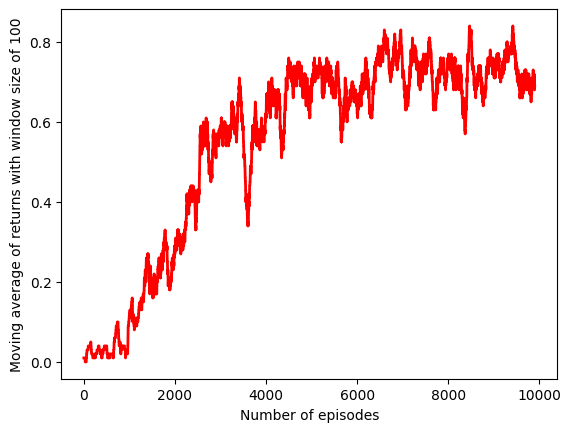

In [30]:
plt.plot(averaged_returns, linewidth=2, color='red')
plt.xlabel("Number of episodes")
plt.ylabel("Moving average of returns with window size of {}".format(window_size))
plt.show()

# Replacing Traces

In [31]:
num_states = env.observation_space.n # Number of states
num_actions = env.action_space.n # Number of actions
Q = np.zeros((num_states, num_actions)) # Q-value table with zero initialization
returns = []

In [32]:
for episode in range(episodes):

  state = env.reset()
  epsilon *= epsilon_decay

  action = epsilon_greedy(state, Q, epsilon)

  R = [] # Reward array
  E = np.zeros((num_states, num_actions)) # Eligibility traces

  while True:

    E = eligibility_decay * gamma * E
    E[state, action] = 1

    new_state, reward, done, info = env.step(action)
    new_action = epsilon_greedy(new_state, Q, epsilon)

    R.append(reward)

    delta = reward + gamma * Q[new_state, new_action] - Q[state, action] # TD error
    Q = Q + alpha * delta * E # TD update

    state, action = new_state, new_action

    if done: # Reached terminal state
       break

  # Calculating return for plotting purpose
  T = len(R)
  G = 0

  t = T - 1

  while t >= 0:
    G = R[t] + gamma * G
    t = t - 1

  returns.append(G)

In [33]:
# Averaging over windows to avoid congestion in graph
window_size = 100
averaged_returns = np.zeros(len(returns)-window_size+1)

for i in range(len(averaged_returns)):
  averaged_returns[i] = np.mean(returns[i:i+window_size])

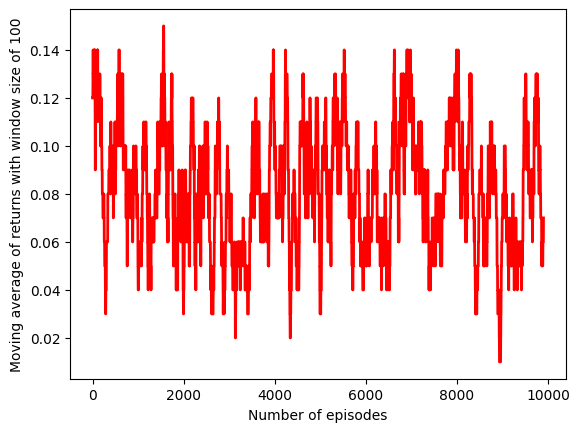

In [34]:
plt.plot(averaged_returns, linewidth=2, color='red')
plt.xlabel("Number of episodes")
plt.ylabel("Moving average of returns with window size of {}".format(window_size))
plt.show()

# Further experiments:



1. Tweak hyperparameters: γ, α, ϵ, and λ
2. Decay ϵ differently
3. Decay α
4. Run for more number of episodes
5. Aggressive version of SARSA(λ)
6. Dutch traces
7. Watkins Q(λ): might not work well in practice
8. Different environments

